##  1. Import necessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib as plt

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.ensemble import StackingRegressor


## 2. Exploratory Data Analysis

### 2.1 Understaning the data

In [2]:
df1 =  pd.read_csv(r'D:\Finel_project\Real_estate_datadset.csv')
df1

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Project Description:
1.Determine the factors that influence real estate prices.

2.Predict the price of a new real estate based on existing data.

3.Purpose The main objective of the project is to predict the house price per unit area (variable Y) based on the characteristics of the property.

In [3]:
df1.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df1.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [5]:
df = df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

###  change name of columns 

In [7]:
df = df.set_axis(['No', 'transaction_date', 'house_age', 'dist_to_MRT', 'conv_store', 'lat', 'long', 'house_price'], axis=1)
df.set_index('No')

,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [8]:
df.describe()

,No,transaction_date,house_age,dist_to_MRT,conv_store,lat,long,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


##  3. Visualizing the data

### 3.1 Univarient

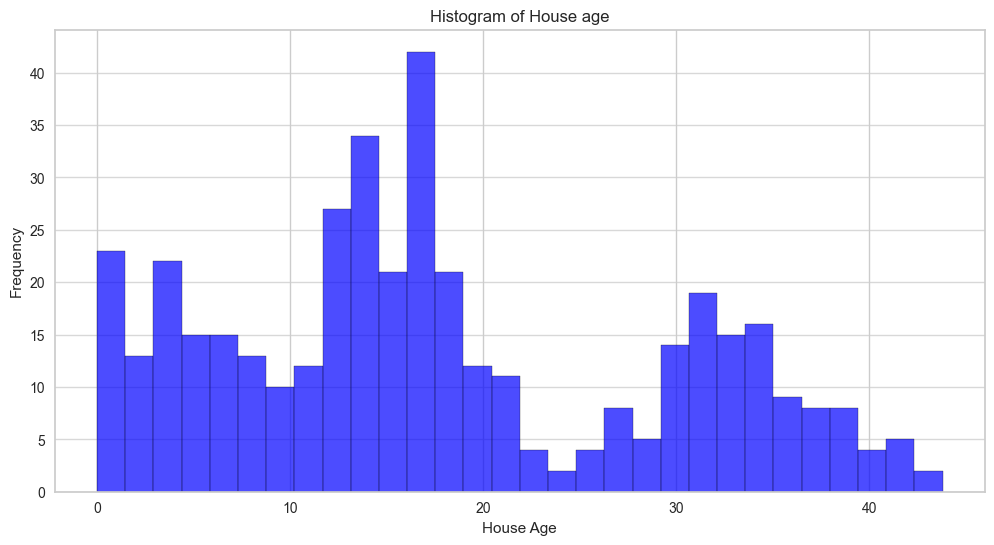

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(df['house_age'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of House age')
plt.xlabel('House Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

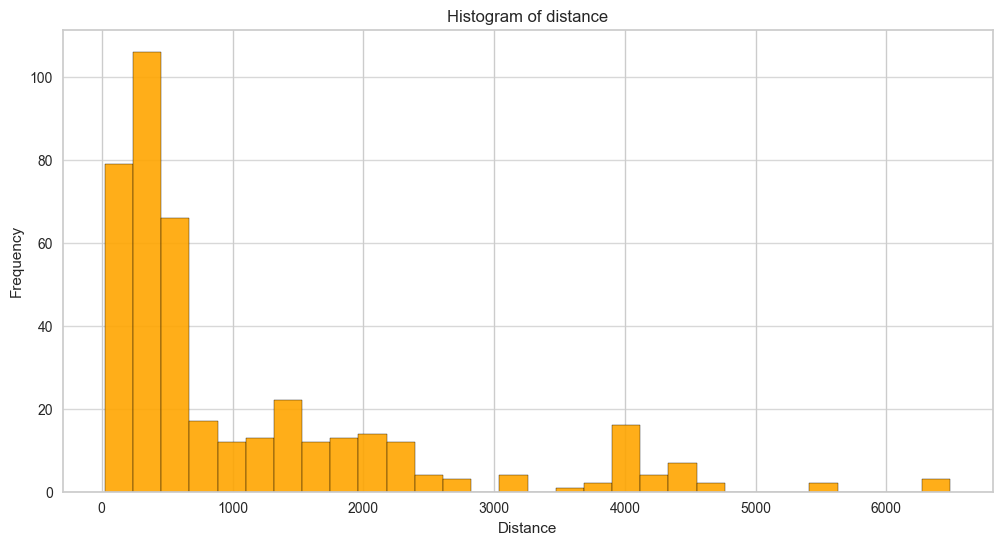

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(df['dist_to_MRT'], bins=30, color='orange', alpha=0.9, edgecolor='black')
plt.title('Histogram of distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

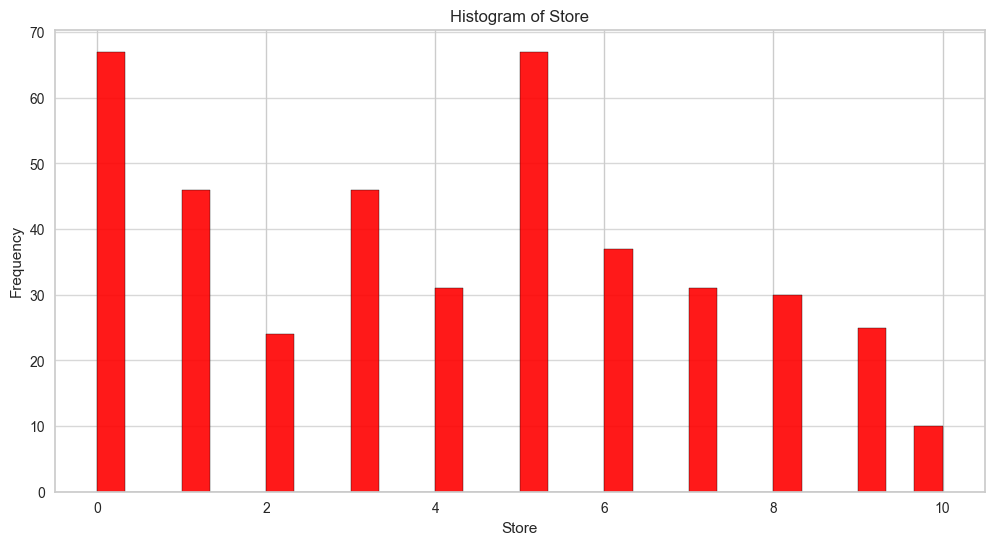

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(df['conv_store'], bins=30, color='red', alpha=0.9, edgecolor='black')
plt.title('Histogram of Store')
plt.xlabel('Store')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Target

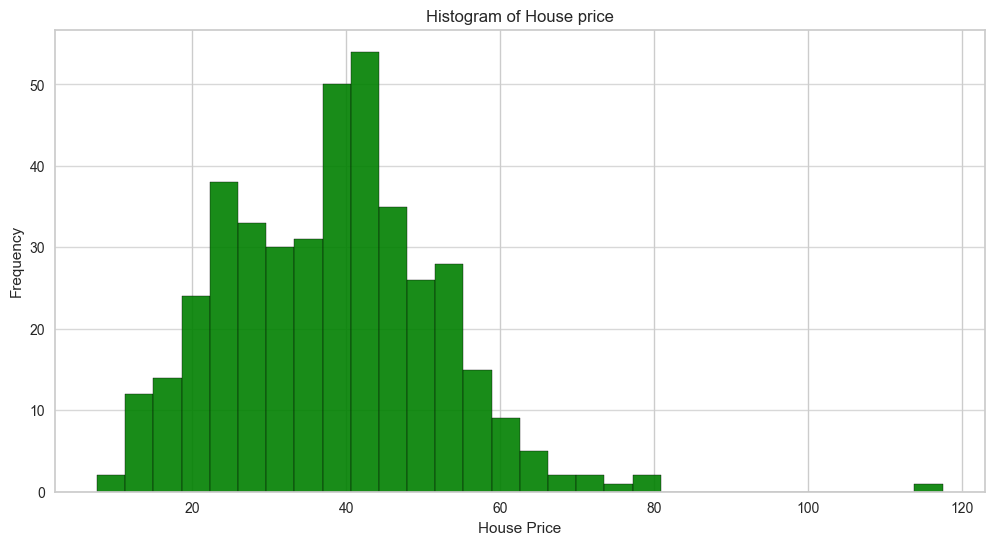

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df['house_price'], bins=30, color='green', alpha=0.9, edgecolor='black')
plt.title('Histogram of House price')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### 3.2 3D Visualization

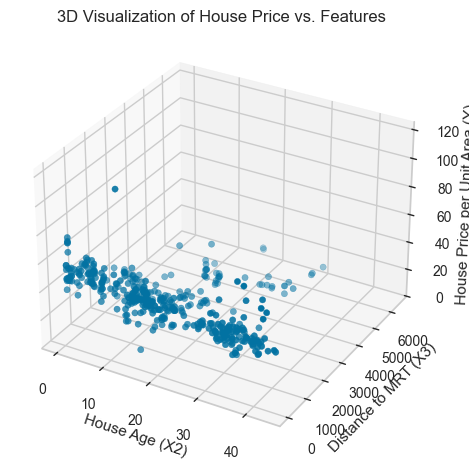

In [13]:
x2 = df['house_age']
x3 = df['dist_to_MRT']
y = df['house_price']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x2, x3, y, c='b', marker='o')

ax.set_xlabel('House Age (X2)')
ax.set_ylabel('Distance to MRT (X3)')
ax.set_zlabel('House Price per Unit Area (Y)')
ax.set_title('3D Visualization of House Price vs. Features')

plt.show()


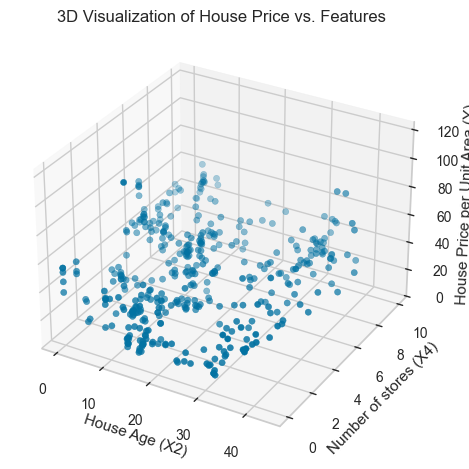

In [14]:
x4 = df['conv_store']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x2, x4, y, c='b', marker='o')

ax.set_xlabel('House Age (X2)')
ax.set_ylabel('Number of stores (X4)')
ax.set_zlabel('House Price per Unit Area (Y)')
ax.set_title('3D Visualization of House Price vs. Features')

plt.show()

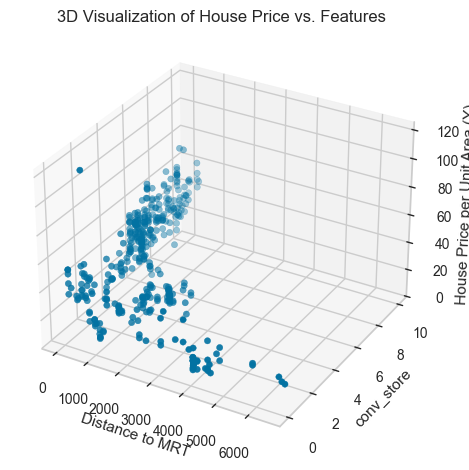

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x3, x4, y, c='b', marker='o')

ax.set_xlabel('Distance to MRT')
ax.set_ylabel('conv_store')
ax.set_zlabel('House Price per Unit Area (Y)')
ax.set_title('3D Visualization of House Price vs. Features')

plt.show()

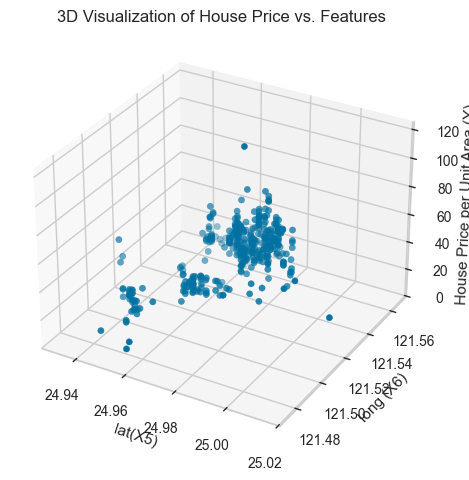

In [16]:
x5 = df['lat']
x6 = df['long']


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x5, x6, y, c='b', marker='o')

ax.set_xlabel('lat(X5)')
ax.set_ylabel('long (X6)')
ax.set_zlabel('House Price per Unit Area (Y)')
ax.set_title('3D Visualization of House Price vs. Features')

plt.show()

<Axes: >

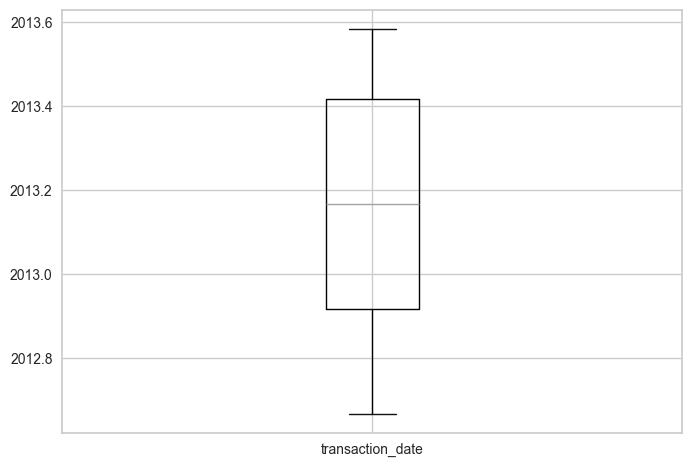

In [17]:
df.boxplot(column=['transaction_date'])


<Axes: >

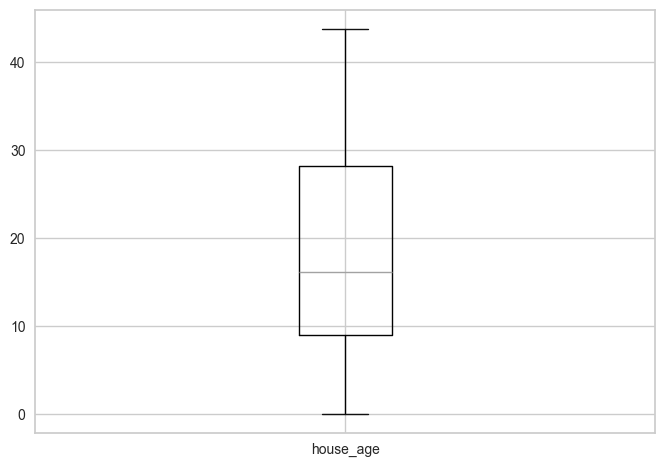

In [18]:
df.boxplot(column=['house_age'])

<Axes: >

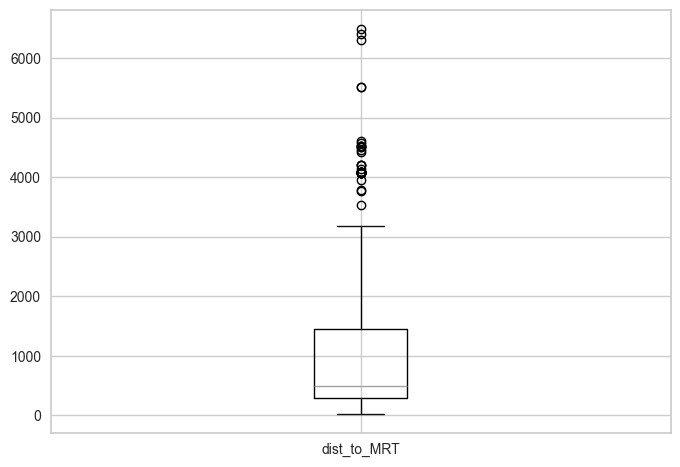

In [19]:
df.boxplot(column=['dist_to_MRT'])

<Axes: >

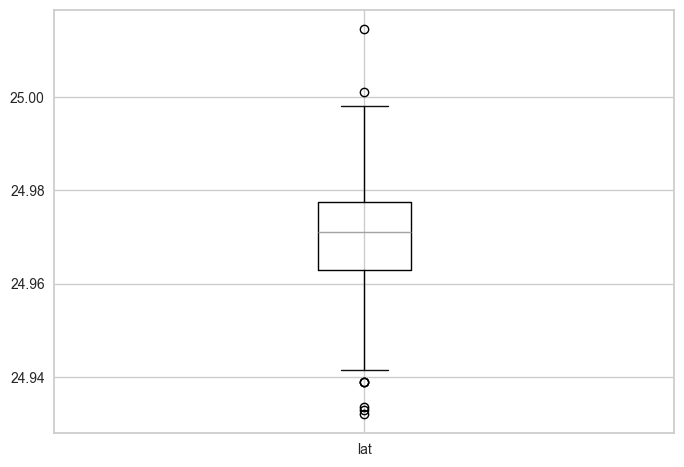

In [20]:
df.boxplot(column=['lat'])


<Axes: >

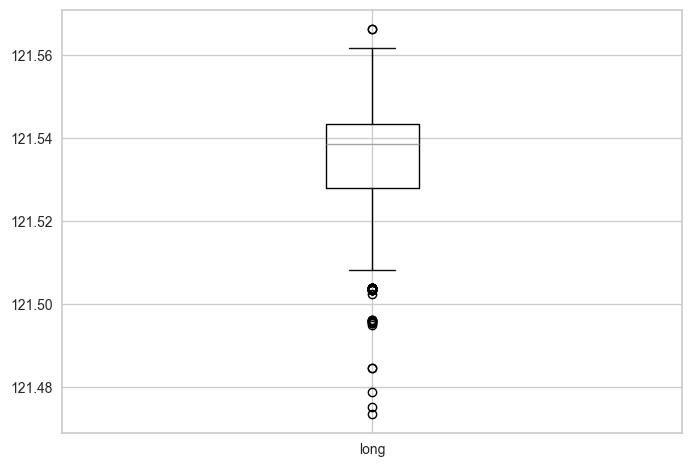

In [21]:
df.boxplot(column=['long'])


<Axes: >

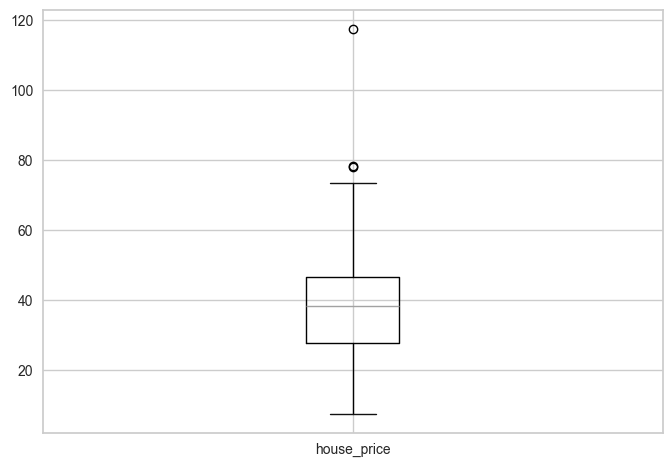

In [22]:
df.boxplot(column=['house_price'])

Text(0.5, 1.0, '1 hundred')

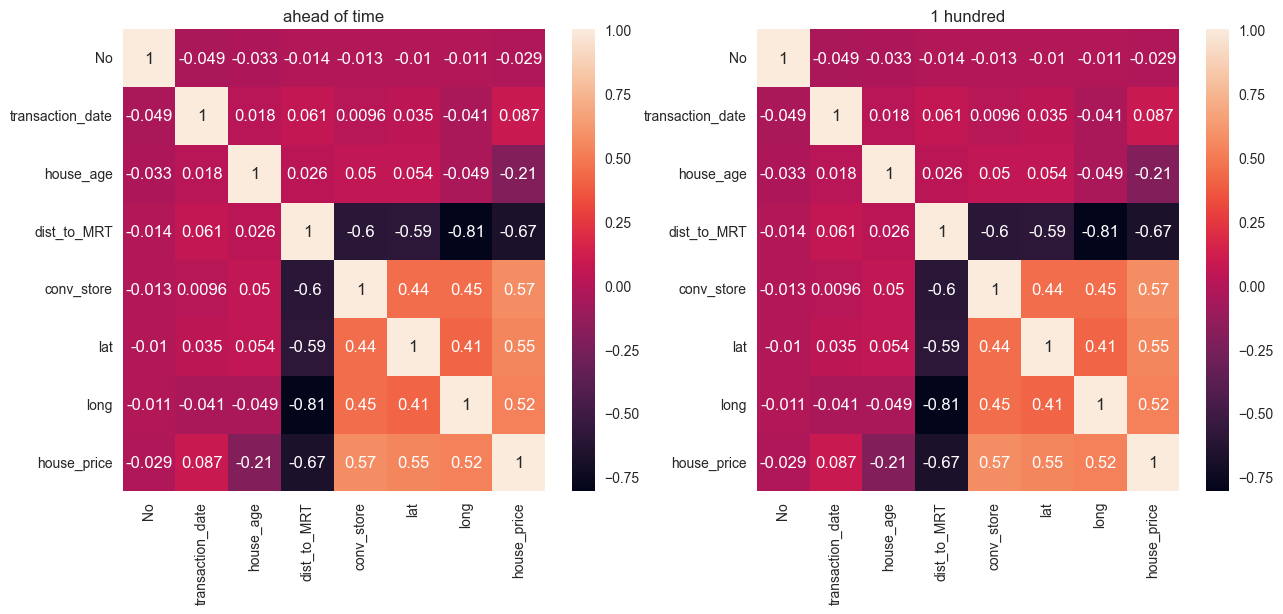

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 hàng, 2 cột
sns.heatmap(df.corr(), annot=True,ax=axs[0])
axs[0].set_title('ahead of time')
sns.heatmap(df.corr(), annot=True,ax=axs[1])
axs[1].set_title('1 hundred')

## 4.Data preprocessing

In [24]:
Q1 = df.dist_to_MRT.quantile(0.25)
Q3 = df.dist_to_MRT.quantile(0.75)
IQR = Q3 - Q1
df_dist_to_MRT_outliers = df[~((df.dist_to_MRT < (Q1 - 1.5 * IQR)) | (df.dist_to_MRT > (Q3 + 1.5 * IQR)))]
df_dist_to_MRT_outliers.shape

(377, 8)

In [ ]:
Q1 = df_dist_to_MRT_outliers.lat.quantile(0.25)
Q3 = df_dist_to_MRT_outliers.lat.quantile(0.75)
IQR = Q3 - Q1
df_lat_outliers = df_dist_to_MRT_outliers[~((df_dist_to_MRT_outliers.lat < (Q1 - 1.5 * IQR)) | (df_dist_to_MRT_outliers.lat > (Q3 + 1.5 * IQR)))]
df_lat_outliers.shape

(376, 8)

In [26]:
Q1 = df_lat_outliers.long.quantile(0.25)
Q3 = df_lat_outliers.long.quantile(0.75)
IQR = Q3 - Q1
df_long_outliers = df_lat_outliers[~((df_lat_outliers.long < (Q1 - 1.5 * IQR)) | (df_lat_outliers.long > (Q3 + 1.5 * IQR)))]
df_long_outliers.shape

(315, 8)

In [27]:
Q1 = df_long_outliers.house_price.quantile(0.25)
Q3 = df_long_outliers.house_price.quantile(0.75)
IQR = Q3 - Q1
df_house_price_outliers = df_long_outliers[~((df_long_outliers.house_price < (Q1 - 1.5 * IQR)) | (df_long_outliers.house_price > (Q3 + 1.5 * IQR)))]
df_house_price_outliers.shape

(303, 8)

In [28]:
df.isnull().sum()

No                  0
transaction_date    0
house_age           0
dist_to_MRT         0
conv_store          0
lat                 0
long                0
house_price         0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df = df.drop(['No', 'transaction_date'], axis=1)


### Training and testing the data 

In [31]:
# Separate features (X) and target (y)
X = df[['house_age', 'dist_to_MRT', 'conv_store', 'lat', 'long']]
y = df['house_price']

In [32]:
X.shape,y.shape

((414, 5), (414,))

In [33]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [34]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 5. Moodel building

In [35]:
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#### y=mx+c

m---> slop,  c---> y intersept

In [36]:
print ("intercept value (b): ", model.intercept_)

intercept value (b):  38.051143871297825


In [42]:
print ("slop value (m): ", model.coef_)

slop value (m):  [-3.01942226 -5.49994313  3.23435131  2.91597064 -0.11141314]


##### y = 3,23x + 38.05

In [49]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [59]:
y_pred.shape

(83,)

In [60]:
X_test.shape

(83, 5)

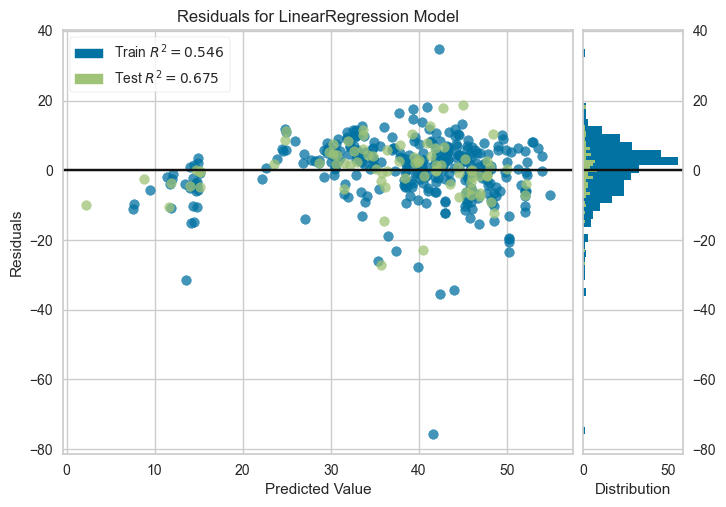

In [37]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();

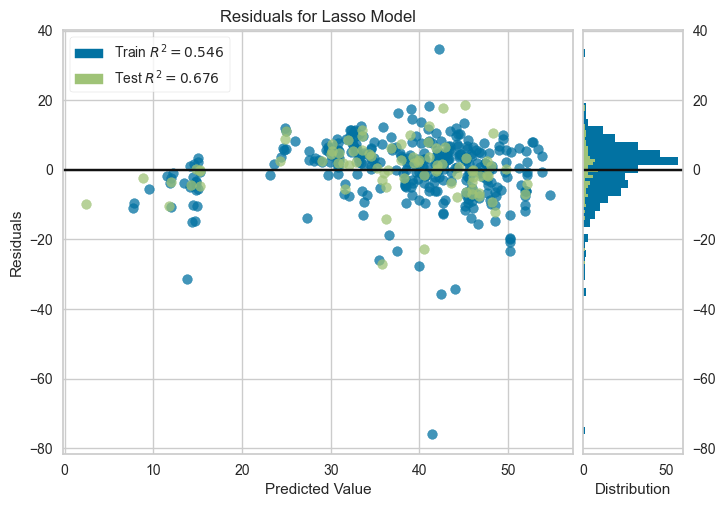

In [38]:
model = Lasso(alpha = 0.05)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();

## 6.Evoluate the model

In [58]:
# Evaluate the model
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print("root mean squared Error",np.sqrt(mse))
print(f'R² Score: {r2}')

Mean Absolute Error: 5.356367436738796
Mean Squared Error: 54.384337619545654
root mean squared Error 7.374573724598979
R² Score: 0.6758200975146269


In [41]:
# Predict house price for a new property
new_property = [[10, 500, 5, 24.972, 121.544]]  # Example values: house age, MRT distance, stores, lat, long
new_property_scaled = scaler.transform(new_property)
predicted_price = model.predict(new_property_scaled)

print(f'Predicted  Price: {predicted_price[0]}')

Predicted  Price: 44.261025485013796


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
